In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pvcircuit as pvc
import ipywidgets as widgets
#%matplotlib inline
#import ipympl
%matplotlib widget

# 4J IMM solar cell (MM927) from:
###  J. F. Geisz, et al., IEEE Journal of Photovoltaics __5__, 1827 (2015). 

In [3]:
# data MM927
path = pvc.datapath
ELcsv = 'MM927Bn10EL.csv'
JVscv = 'MM927Bn10JV.csv'
dfEL = pd.read_csv(path+ELcsv, index_col=0)
dfJV = pd.read_csv(path+JVscv, index_col=0)
#parse
data_I0=np.array(dfEL['J0'])/1000.  #->A
data_V0=np.array(dfEL['V0'])
data_I1=np.array(dfEL['J1'])/1000.  #->A
data_V1=np.array(dfEL['V1'])
data_I2=np.array(dfEL['J2'])/1000.  #->A
data_V2=np.array(dfEL['V2'])
data_I3=np.array(dfEL['J3'])/1000.  #->A
data_V3=np.array(dfEL['V3'])
data_Itot=np.array(dfEL['Jtot'])/1000.  #->A
data_Vtot=np.array(dfEL['Vtot'])

data_darkV=np.array(dfJV.index)
data_darkI=np.array(dfJV['Jdark'])/1000.  #->A
data_lightV=np.array(dfJV['Vlight'])
data_lightI=np.array(dfJV['Jlight'])/1000.  #->A

In [4]:
# 4J model
totalarea=1.15
MM927 = pvc.Multi2T(name='MM927',Eg_list = [1.83,1.404,1.049,0.743], Jext=.012, Rs2T=0.1,area=1)
MM927.j[0].set(Jext=0.01196,n=[1,1.6],J0ratio=[31,4.5],totalarea=totalarea)
MM927.j[1].set(Jext=0.01149,n=[1,1.8],J0ratio=[17,42],beta=14.3,totalarea=totalarea)
MM927.j[2].set(Jext=0.01135,n=[1,1.4],J0ratio=[51,14],beta=8.6,totalarea=totalarea)
MM927.j[3].set(Jext=0.01228,n=[1,1.5],J0ratio=[173,79],beta=10.5,totalarea=totalarea)
MM927.j[3].RBB_dict={'method':'JFG', 'mrb':43., 'J0rb':0.3, 'Vrb':0.}

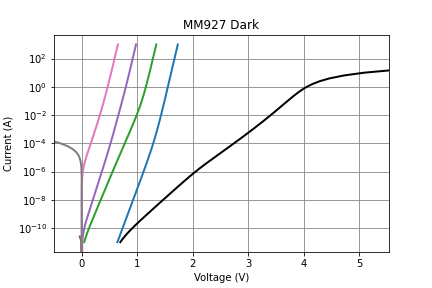

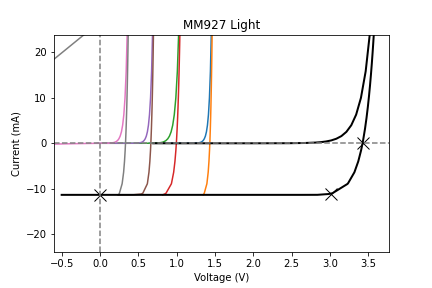

In [5]:
ui, dax, lax =  MM927.controls()
ui

In [6]:
# add data to interactive plots
dax.plot(data_darkV, data_darkI, c='blue', lw=0, marker='.', label='pdata', zorder=0)
#dax.plot(data_darkV, -data_darkI, c='blue', lw=0, marker='.', label='ndata', zorder=0)
lax.plot(data_darkV, data_darkI*1000, c='blue', lw=0, marker='.', label='ddata', zorder=0)
lax.plot(data_lightV, data_lightI*1000, c='red', lw=0, marker='.', label='ldata', zorder=0)
dax.plot(data_V0, data_I0, c='lightblue', lw=0, marker='s', ms=8, fillstyle='none', label='I0', zorder=1)
dax.plot(data_V1, data_I1, c='green', lw=0, marker='s', ms=8, fillstyle='none', label='I1', zorder=1)
dax.plot(data_V2, data_I2, c='purple', lw=0, marker='s', ms=8, fillstyle='none', label='I2', zorder=1)
dax.plot(data_V3, data_I3, c='pink', lw=0, marker='s', ms=8, fillstyle='none', label='I3', zorder=1)
dax.plot(data_Vtot, data_Itot, c='blue', lw=0, marker='s', ms=8, fillstyle='none', label='Itot', zorder=1)

In [7]:
MM927

MM927: <tandem.Multi2T class>
T = 25.0 C, Rs2T= 0.1 Ω cm2

j[0]: <tandem.Junction class>
Eg = 1.83 eV, TC = 25.0 C
Jext = 12.0 , JLC = 0.0 mA/cm2
Gsh = 0 S/cm2, Rser = 0 Ωcm2
lightA = 1 cm2, totalA = 1.15 cm2
pn = -1, beta = 0, gamma = 0
   n    J0ratio   J0(A/cm2) 
  db       1      1.633e-28 
 1.00    31.00    5.064e-27 
 1.60     4.50    1.450e-18 

j[1]: <tandem.Junction class>
Eg = 1.40 eV, TC = 25.0 C
Jext = 11.5 , JLC = 3.9 mA/cm2
Gsh = 0 S/cm2, Rser = 0 Ωcm2
lightA = 1 cm2, totalA = 1.15 cm2
pn = -1, beta = 14.3, gamma = 0
   n    J0ratio   J0(A/cm2) 
  db       1      1.540e-21 
 1.00    17.00    2.618e-20 
 1.80    42.00    5.339e-12 

j[2]: <tandem.Junction class>
Eg = 1.05 eV, TC = 25.0 C
Jext = 11.4 , JLC = 0.9 mA/cm2
Gsh = 0 S/cm2, Rser = 0 Ωcm2
lightA = 1 cm2, totalA = 1.15 cm2
pn = -1, beta = 8.6, gamma = 0
   n    J0ratio   J0(A/cm2) 
  db       1      8.719e-16 
 1.00    51.00    4.447e-14 
 1.40    14.00    3.405e-11 

j[3]: <tandem.Junction class>
Eg = 0.74 eV, TC =